In [1]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [2]:
!pip install datasets scikit-learn accelerate
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

## Loading data


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/MiSongGiny/data/Task2/subtask2_train_rev002.csv', encoding='utf-8')
df1 = df1.dropna(subset=['lyrics'])
df1['label'] = df1['label'].map({'NR': 0, 'S': 1, 'V': 2, 'H': 3})
df1['label'].value_counts()

,count
label,
0,526
1,435
2,129
3,78


In [5]:
df1['label'].value_counts()

,count
label,
0,526
1,435
2,129
3,78


In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/MiSongGiny/data/Task2/generated_songs.csv', encoding='utf-8')
df2 = df2.dropna(subset=['lyrics'])
df2['label'] = df2['label'].map({'NR': 0, 'S': 1, 'V': 2, 'H': 3})
df2

,id,lyrics,label
0,GS_H_Siempre Te Veo,"[Verso 1]\nNo puedes escapar, yo sé dónde está...",3
1,GS_H_No Te Dejo Ir,"[Intro]\nYeh, yeh, tú eres mía, mami,\nNo impo...",3
2,GS_H_Eres Mi Prisión,"[Verso 1]\nTe pienso en la noche, no puedo dor...",3
3,GS_H_Sin Ti No Vivo,"[Verso 1]\nNo me dejes solo, no me hagas sufri...",3
4,GS_H_Te Tengo en la Mira,"[Intro]\nYeh, yeh, no te escapes, mami,\nTe te...",3
...,...,...,...
385,GS_V_Daga en la Villa,"[Verso]\nEn la villa, tu risa escuché,\nTu tra...",2
386,GS_V_Maldición en la Playa,"[Verso]\nEn la playa, tu sombra creí ver,\nTu ...",2
387,GS_V_Filo en la Discoteca,"[Verso]\nEn la discoteca, tu paso fue cruel,\n...",2
388,GS_V_Corte en el Taller,"[Verso]\nEn el taller, tu risa sonó,\nComo un ...",2


In [7]:
df_final = pd.concat([df1, df2], ignore_index=True)
df_final

,id,lyrics,label
0,T2_TRAIN_0001,".\nQue no me falte tu cuerpo jamás, jamás\nNi ...",0
1,T2_TRAIN_0002,"\n[Letra de ""Que Te Vaya Bonito""]\n\n[Verso 1]...",0
2,T2_TRAIN_0003,\n[Coro:]\nAy me canse de rogarle (yo ah)\nAy ...,3
3,T2_TRAIN_0004,"\n[Letra de ""Te Conozco""]\n\n[Verso 1]\nTe con...",1
4,T2_TRAIN_0005,Letra subida por enriquembu\n\nSoy un hombre d...,0
...,...,...,...
1553,GS_V_Daga en la Villa,"[Verso]\nEn la villa, tu risa escuché,\nTu tra...",2
1554,GS_V_Maldición en la Playa,"[Verso]\nEn la playa, tu sombra creí ver,\nTu ...",2
1555,GS_V_Filo en la Discoteca,"[Verso]\nEn la discoteca, tu paso fue cruel,\n...",2
1556,GS_V_Corte en el Taller,"[Verso]\nEn el taller, tu risa sonó,\nComo un ...",2


In [8]:
df_final['label'].value_counts()

,count
label,
0,526
1,435
2,324
3,273


In [9]:
df_final.to_csv("/content/drive/MyDrive/MiSongGiny/df_task2_extended.csv", index=True)

In [ ]:
train_test, val = train_test_split(df_final, test_size=0.20, random_state=42, stratify=df_final['label'])

test, train = train_test_split(train_test, test_size=0.875, random_state=42, stratify=train_test['label'])

# Resultado
print("Entrenamiento:", len(train))
print("Validación:", len(val))
print("Prueba:", len(test))

Entrenamiento: 1091
Validación: 312
Prueba: 155


In [ ]:
test_df.to_csv("/content/drive/MyDrive/MiSongGiny/test_task2.csv", index=True)

# Train models

## Training bert-base-spanish-wwm-cased

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

train_df, val_df, test_df = train, val, test  # Usa los DataFrames creados antes

for df in [train_df, val_df, test_df]:
    df['lyrics'] = df['lyrics'].astype(str)
    df['label'] = df['label'].astype(int)

# Convertir a datasets de Hugging Face
train_ds = Dataset.from_pandas(train_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))
val_ds = Dataset.from_pandas(val_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))
test_ds = Dataset.from_pandas(test_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))

# Tokenizer y modelo
model_name = "dccuchile/bert-base-spanish-wwm-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenizar
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/1091 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Map:   0%|          | 0/312 [00:00<?, ? examples/s]

Map:   0%|          | 0/155 [00:00<?, ? examples/s]

In [ ]:
# Métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average='weighted') # Changed to 'weighted' for multiclass
    }

In [ ]:
# Entrenamiento
training_args = TrainingArguments(
    output_dir="./results/beto",
    eval_strategy = "epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    logging_dir="./logs",
    report_to="none"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-35-6c948078bb4e>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Entrenar
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.768146,0.727564,0.728001
2,No log,0.797860,0.727564,0.726808
3,No log,0.871750,0.740385,0.740706
4,0.542300,0.956140,0.740385,0.743265
5,0.542300,1.094762,0.721154,0.721886
6,0.542300,1.169292,0.721154,0.720774


TrainOutput(global_step=822, training_loss=0.37943673887972124, metrics={'train_runtime': 728.8519, 'train_samples_per_second': 8.981, 'train_steps_per_second': 1.128, 'total_flos': 1722355896508416.0, 'train_loss': 0.37943673887972124, 'epoch': 6.0})

In [ ]:
# Evaluar en test
test_metrics = trainer.evaluate(test_ds)
print(test_metrics)

{'eval_loss': 0.9914035797119141, 'eval_accuracy': 0.7419354838709677, 'eval_f1': 0.7437888045588358, 'eval_runtime': 4.6279, 'eval_samples_per_second': 33.493, 'eval_steps_per_second': 4.322, 'epoch': 6.0}


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Obtener predicciones en el test set
preds_output = trainer.predict(test_ds)

# Convertir logits a clases predichas
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = preds_output.label_ids

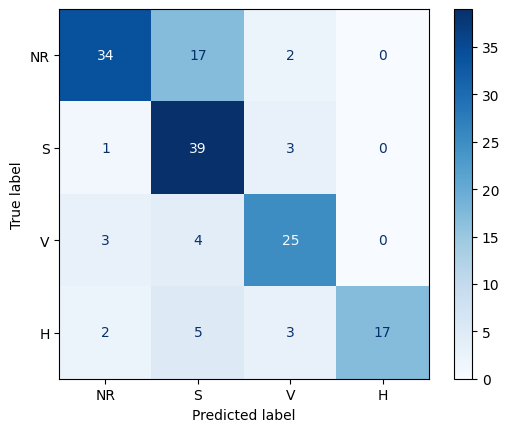

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NR", "S", "V", "H"])
disp.plot(cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["NR", "S", "V", "H"]))

              precision    recall  f1-score   support

          NR       0.85      0.64      0.73        53
           S       0.60      0.91      0.72        43
           V       0.76      0.78      0.77        32
           H       1.00      0.63      0.77        27

    accuracy                           0.74       155
   macro avg       0.80      0.74      0.75       155
weighted avg       0.79      0.74      0.74       155



## Train roberta-base-bne

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Cargar tus splits
train_df, val_df, test_df = train, val, test  # Usa los DataFrames creados antes

for df in [train_df, val_df, test_df]:
    df['lyrics'] = df['lyrics'].astype(str)
    df['label'] = df['label'].astype(int)

# Convertir a datasets de Hugging Face
train_ds = Dataset.from_pandas(train_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))
val_ds = Dataset.from_pandas(val_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))
test_ds = Dataset.from_pandas(test_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))

# Tokenizer y modelo
model_name = "PlanTL-GOB-ES/roberta-base-bne"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenizar
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/1091 [00:00<?, ? examples/s]

Map:   0%|          | 0/312 [00:00<?, ? examples/s]

Map:   0%|          | 0/155 [00:00<?, ? examples/s]

In [ ]:
# Métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average='weighted') # Changed to 'weighted' for multiclass
    }

In [ ]:
# Entrenamiento
training_args = TrainingArguments(
    output_dir="./results/roberta",
    eval_strategy = "epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    logging_dir="./logs",
    report_to="none"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-21-6c948078bb4e>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Entrenar
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.810437,0.711538,0.714887
2,No log,0.803592,0.698718,0.696285
3,No log,0.716820,0.750000,0.750134
4,No log,0.724147,0.750000,0.750937


TrainOutput(global_step=140, training_loss=0.7069246019635882, metrics={'train_runtime': 446.0378, 'train_samples_per_second': 9.784, 'train_steps_per_second': 0.314, 'total_flos': 1148237264338944.0, 'train_loss': 0.7069246019635882, 'epoch': 4.0})

In [ ]:
# Evaluar en test
test_metrics = trainer.evaluate(test_ds)
print(test_metrics)

{'eval_loss': 0.6861249208450317, 'eval_accuracy': 0.7806451612903226, 'eval_f1': 0.7828497382322752, 'eval_runtime': 4.5988, 'eval_samples_per_second': 33.705, 'eval_steps_per_second': 1.087, 'epoch': 4.0}


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Obtener predicciones en el test set
preds_output = trainer.predict(test_ds)

# Convertir logits a clases predichas
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = preds_output.label_ids

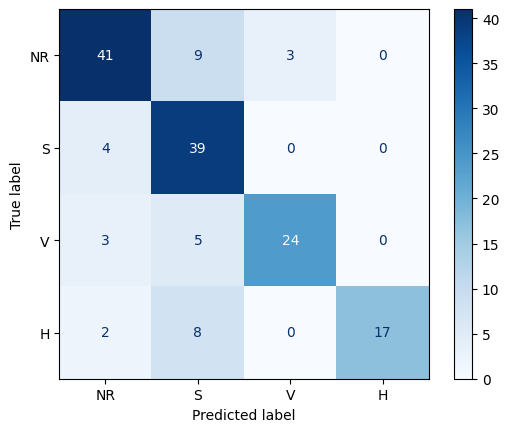

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NR", "S", "V", "H"])
disp.plot(cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["NR", "S", "V", "H"]))

              precision    recall  f1-score   support

          NR       0.82      0.77      0.80        53
           S       0.64      0.91      0.75        43
           V       0.89      0.75      0.81        32
           H       1.00      0.63      0.77        27

    accuracy                           0.78       155
   macro avg       0.84      0.77      0.78       155
weighted avg       0.82      0.78      0.78       155



## Modelo beto-sentiment-analysis

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

# Cargar tus splits
train_df, val_df, test_df = train, val, test  # Usa los DataFrames creados antes

for df in [train_df, val_df, test_df]:
    df['lyrics'] = df['lyrics'].astype(str)
    df['label'] = df['label'].astype(int)

# Convertir a datasets de Hugging Face
train_ds = Dataset.from_pandas(train_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))
val_ds = Dataset.from_pandas(val_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))
test_ds = Dataset.from_pandas(test_df[['lyrics', 'label']].rename(columns={'lyrics': 'text'}).reset_index(drop=True))

# Tokenizer y modelo
model_name = "finiteautomata/beto-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=4,
    ignore_mismatched_sizes=True  # <-- Add this argument
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at finiteautomata/beto-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream

In [ ]:
# Tokenizar
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/1091 [00:00<?, ? examples/s]

Map:   0%|          | 0/312 [00:00<?, ? examples/s]

Map:   0%|          | 0/155 [00:00<?, ? examples/s]

In [ ]:
# Métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average='weighted')
    }

In [ ]:
# Entrenamiento
training_args = TrainingArguments(
    output_dir="./results/beto",
    eval_strategy = "epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,  # Reduced batch size
    per_device_eval_batch_size=16,  # Reduced batch size
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    logging_dir="./logs",
    report_to="none",
    gradient_accumulation_steps=2 # Accumulate gradients over 2 steps
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-15-6c948078bb4e>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Entrenar
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.793071,0.708333,0.709181
2,No log,0.774057,0.721154,0.718938
3,No log,0.758336,0.705128,0.706895


TrainOutput(global_step=136, training_loss=0.6324167251586914, metrics={'train_runtime': 449.5639, 'train_samples_per_second': 9.707, 'train_steps_per_second': 0.303, 'total_flos': 1122188802109440.0, 'train_loss': 0.6324167251586914, 'epoch': 3.898550724637681})

In [ ]:
# Evaluar en test
test_metrics = trainer.evaluate(test_ds)
print(test_metrics)

{'eval_loss': 0.6263092160224915, 'eval_accuracy': 0.7741935483870968, 'eval_f1': 0.7769577854251882, 'eval_runtime': 4.6388, 'eval_samples_per_second': 33.414, 'eval_steps_per_second': 2.156, 'epoch': 3.898550724637681}


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Obtener predicciones en el test set
preds_output = trainer.predict(test_ds)

# Convertir logits a clases predichas
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = preds_output.label_ids

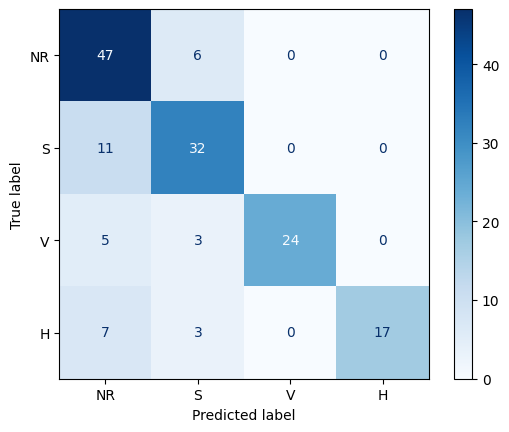

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NR", "S", "V", "H"])
disp.plot(cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["NR", "S", "V", "H"]))

              precision    recall  f1-score   support

          NR       0.67      0.89      0.76        53
           S       0.73      0.74      0.74        43
           V       1.00      0.75      0.86        32
           H       1.00      0.63      0.77        27

    accuracy                           0.77       155
   macro avg       0.85      0.75      0.78       155
weighted avg       0.81      0.77      0.78       155



# Upload model to huggingfaces

In [ ]:
!pip install -U transformers huggingface_hub

In [ ]:
from huggingface_hub import login

# Inserta tu token personal de Hugging Face (lo puedes generar en huggingface.co/settings/tokens)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Nombre del modelo
model_name = "misoginia-beto-sentiment-analysis-task2-V1"

# Guarda localmente
trainer.save_model(model_name)
tokenizer.save_pretrained(model_name)

('misoginia-beto-sentiment-analysis-task2-V1/tokenizer_config.json',
 'misoginia-beto-sentiment-analysis-task2-V1/special_tokens_map.json',
 'misoginia-beto-sentiment-analysis-task2-V1/vocab.txt',
 'misoginia-beto-sentiment-analysis-task2-V1/added_tokens.json',
 'misoginia-beto-sentiment-analysis-task2-V1/tokenizer.json')

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Recarga desde el directorio guardado
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Sube al Hub (esto crea un repo con ese nombre en tu cuenta)
model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/no0ne-97/misoginia-beto-sentiment-analysis-task2-V1/commit/53035ff6590189b2fdd9f19d5f2f832e2e4cd0be', commit_message='Upload tokenizer', commit_description='', oid='53035ff6590189b2fdd9f19d5f2f832e2e4cd0be', pr_url=None, repo_url=RepoUrl('https://huggingface.co/no0ne-97/misoginia-beto-sentiment-analysis-task2-V1', endpoint='https://huggingface.co', repo_type='model', repo_id='no0ne-97/misoginia-beto-sentiment-analysis-task2-V1'), pr_revision=None, pr_num=None)